In [80]:
from ucimlrepo import fetch_ucirepo 
from sklearn.model_selection import train_test_split
from scipy.stats import norm
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
import numpy as np
  
# fetch dataset 
abalone = fetch_ucirepo(id=1) 
  
# data (as pandas dataframes) 
X = abalone.data.features 
y = abalone.data.targets 
  
# metadata 
print(abalone.metadata) 
  
# variable information 
print(abalone.variables) 


{'uci_id': 1, 'name': 'Abalone', 'repository_url': 'https://archive.ics.uci.edu/dataset/1/abalone', 'data_url': 'https://archive.ics.uci.edu/static/public/1/data.csv', 'abstract': 'Predict the age of abalone from physical measurements', 'area': 'Biology', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Tabular'], 'num_instances': 4177, 'num_features': 8, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['Rings'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C55C7W', 'creators': ['Warwick Nash', 'Tracy Sellers', 'Simon Talbot', 'Andrew Cawthorn', 'Wes Ford'], 'intro_paper': None, 'additional_info': {'summary': 'Predicting the age of abalone from physical measurements.  The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- 

In [81]:
X.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [82]:
X_ejercicio = X.copy()
X_ejercicio = X_ejercicio.drop('Sex', axis=1)

In [83]:
X_ejercicio.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [84]:
# Calculate the average value of 'rings'
average_rings = y.mean()

# Create a new column 'ringClass'
y['ringClass'] = (y >= average_rings).astype(int)

/var/folders/db/1bk8jf_n3f12dwr84x4lyc0dnc5f92/T/ipykernel_14917/2281667487.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['ringClass'] = (y >= average_rings).astype(int)


In [85]:
y_class = y['ringClass']

In [86]:

X_train, X_test, y_train, y_test = train_test_split(X_ejercicio, y_class, test_size=0.33, random_state=42)

In [87]:
X_train

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
1593,0.525,0.380,0.135,0.6150,0.2610,0.1590,0.1750
111,0.465,0.360,0.105,0.4310,0.1720,0.1070,0.1750
3271,0.520,0.425,0.155,0.7735,0.2970,0.1230,0.2550
1089,0.450,0.330,0.105,0.3715,0.1865,0.0785,0.0975
2918,0.600,0.445,0.135,0.9205,0.4450,0.2035,0.2530
...,...,...,...,...,...,...,...
3444,0.490,0.400,0.115,0.5690,0.2560,0.1325,0.1450
466,0.670,0.550,0.190,1.3905,0.5425,0.3035,0.4000
3092,0.510,0.395,0.125,0.5805,0.2440,0.1335,0.1880
3772,0.575,0.465,0.120,1.0535,0.5160,0.2185,0.2350


In [88]:


# Initialize a dictionary to hold the Gaussian classifiers for each feature
gaussian_classifiers = {}

# For each feature in the training set
for feature in X_train.columns:
    # Estimate the parameters (mean and standard deviation) of the Gaussian distribution
    mean = X_train[feature].mean()
    std = X_train[feature].std()

    # Build the univariate Gaussian classifier
    gaussian_classifiers[feature] = norm(loc=mean, scale=std)

# Now, we can use these classifiers to make predictions on the validation set
# For each feature in the validation set
for feature in X_test.columns:
    # Get the Gaussian classifier for this feature
    gaussian_classifier = gaussian_classifiers[feature]

    # Use the classifier to make predictions on the validation set
    predictions = gaussian_classifier.pdf(X_test[feature])

    # Here, `predictions` is a numpy array containing the predicted probabilities for each instance in the validation set
    # You can then use these probabilities to make class predictions, evaluate the classifier, etc.

In [89]:

# Initialize dictionaries to hold the metrics for each feature
accuracy_scores = {}
precision_scores = {}
recall_scores = {}

# For each feature in the validation set
for feature in X_test.columns:
    # Get the Gaussian classifier for this feature
    gaussian_classifier = gaussian_classifiers[feature]

    # Write down the parameters
    print(f"Feature: {feature}, Mean: {gaussian_classifier.mean()}, Standard Deviation: {gaussian_classifier.std()}")

    # Use the classifier to make predictions on the validation set
    probabilities = gaussian_classifier.pdf(X_test[feature])

    # Make class predictions based on the probabilities
    # Here, we use a threshold of 0.5, but you can adjust this as needed
    predictions = (probabilities >= 0.5).astype(int)

    # Calculate accuracy, precision, and recall
    accuracy_scores[feature] = accuracy_score(y_test, predictions)
    precision_scores[feature] = precision_score(y_test, predictions)
    recall_scores[feature] = recall_score(y_test, predictions)

    # Report the metrics
    print(f"Feature: {feature}, Accuracy: {accuracy_scores[feature]}, Precision: {precision_scores[feature]}, Recall: {recall_scores[feature]}")

Feature: Length, Mean: 0.5260436025732665, Standard Deviation: 0.11969101663819594
Feature: Length, Accuracy: 0.536620739666425, Precision: 0.5115562403697997, Recall: 0.992526158445441
Feature: Diameter, Mean: 0.4095085775553967, Standard Deviation: 0.09900921271482391
Feature: Diameter, Accuracy: 0.5293691080493111, Precision: 0.5076103500761036, Recall: 0.9970104633781763
Feature: Height, Mean: 0.14010543245175128, Standard Deviation: 0.04271863319732585
Feature: Height, Accuracy: 0.4902102973168963, Precision: 0.48757309941520466, Recall: 0.9970104633781763
Feature: Whole_weight, Mean: 0.8361988920657614, Standard Deviation: 0.49317524668446505
Feature: Whole_weight, Accuracy: 0.5286439448875997, Precision: 0.5105672969966629, Recall: 0.6860986547085202
Feature: Shucked_weight, Mean: 0.3629833809864189, Standard Deviation: 0.22419014461584394
Feature: Shucked_weight, Accuracy: 0.4474256707759246, Precision: 0.46442234123947973, Recall: 0.9073243647234679
Feature: Viscera_weight, Me

In [90]:
# Find the feature with the highest accuracy
best_accuracy_feature = max(accuracy_scores, key=accuracy_scores.get)
print(f"Feature with highest accuracy: {best_accuracy_feature}, Accuracy: {accuracy_scores[best_accuracy_feature]}")

# Find the feature with the highest precision
best_precision_feature = max(precision_scores, key=precision_scores.get)
print(f"Feature with highest precision: {best_precision_feature}, Precision: {precision_scores[best_precision_feature]}")

# Find the feature with the highest recall
best_recall_feature = max(recall_scores, key=recall_scores.get)
print(f"Feature with highest recall: {best_recall_feature}, Recall: {recall_scores[best_recall_feature]}")

Feature with highest accuracy: Length, Accuracy: 0.536620739666425
Feature with highest precision: Length, Precision: 0.5115562403697997
Feature with highest recall: Diameter, Recall: 0.9970104633781763


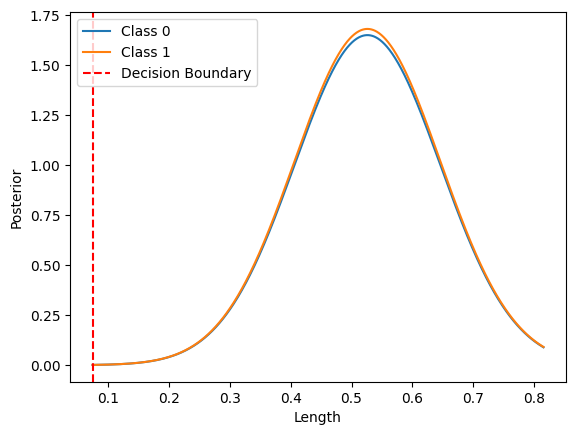

In [91]:

# Get the Gaussian classifier for the 'length' feature
gaussian_classifier = gaussian_classifiers['Length']

# Calculate the pdfs for the two classes
x_values = np.linspace(X_train['Length'].min(), X_train['Length'].max(), 1000)
pdf_class_0 = gaussian_classifier.pdf(x_values) * (y_train == 0).mean()
pdf_class_1 = gaussian_classifier.pdf(x_values) * (y_train == 1).mean()

# Find the decision boundary (where the two pdfs cross)
decision_boundary = x_values[np.abs(pdf_class_0 - pdf_class_1).argmin()]

# Plot the pdfs
plt.plot(x_values, pdf_class_0, label='Class 0')
plt.plot(x_values, pdf_class_1, label='Class 1')

# Plot the decision boundary
plt.axvline(decision_boundary, color='red', linestyle='--', label='Decision Boundary')

# Add labels and legend
plt.xlabel('Length')
plt.ylabel('Posterior')
plt.legend()

# Show the plot
plt.show()

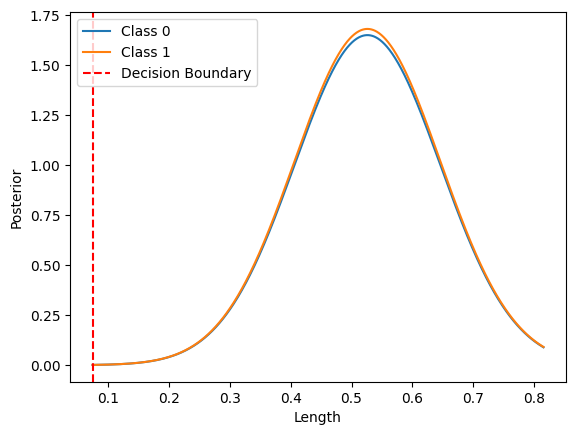

In [92]:
# Find the decision boundary (where the two pdfs cross)
decision_boundary = x_values[np.where(pdf_class_0 < pdf_class_1)[0][0]]

# Plot the pdfs
plt.plot(x_values, pdf_class_0, label='Class 0')
plt.plot(x_values, pdf_class_1, label='Class 1')

# Plot the decision boundary
plt.axvline(decision_boundary, color='red', linestyle='--', label='Decision Boundary')

# Add labels and legend
plt.xlabel('Length')
plt.ylabel('Posterior')
plt.legend()

# Show the plot
plt.show()

Segundo punto

In [93]:
from scipy.stats import multivariate_normal
from itertools import combinations

# Get all combinations of pair of features
feature_pairs = combinations(X_train.columns, 2)

# Initialize a dictionary to hold the Gaussian classifiers for each pair of features
gaussian_classifiers = {}

# Calculate the standard deviation for the covariance matrix
sigma = X_train.std().mean()

# For each pair of features in the training set
for pair in feature_pairs:
    # Initialize a dictionary to hold the Gaussian classifiers for each class
    gaussian_classifiers[pair] = {}

    # For each class
    for class_label in y_train.unique():
        # Get the instances of the current class
        instances = X_train[y_train == class_label]

        # Estimate the parameters (mean) of the Gaussian distribution for each feature
        mean = instances[list(pair)].mean()

        # Build the bivariate Gaussian classifier with the same covariance matrix for all classes
        gaussian_classifiers[pair][class_label] = multivariate_normal(mean=mean, cov=sigma**2 * np.eye(2))

# Now, we can use these classifiers to make predictions on the validation set
# For each pair of features in the validation set
for pair in feature_pairs:
    # For each class
    for class_label in y_train.unique():
        # Get the Gaussian classifier for this pair of features and class
        gaussian_classifier = gaussian_classifiers[pair][class_label]

        # Use the classifier to make predictions on the validation set
        probabilities = gaussian_classifier.pdf(X_test[list(pair)])

        # Here, `probabilities` is a numpy array containing the predicted probabilities for each instance in the validation set
        # You can then use these probabilities to make class predictions, evaluate the classifier, etc.

In [94]:
for pair in feature_pairs:
    # Initialize dictionaries to hold the metrics for each class
    accuracy_scores[pair] = {}
    precision_scores[pair] = {}
    recall_scores[pair] = {}

    # For each class
    for class_label in y_train.unique():
        # Get the Gaussian classifier for this pair of features and class
        gaussian_classifier = gaussian_classifiers[pair][class_label]

        # Use the classifier to make predictions on the validation set
        probabilities = gaussian_classifier.pdf(X_test[list(pair)])

        # Make class predictions based on the probabilities
        # Here, we use a threshold of 0.5, but you can adjust this as needed
        predictions = (probabilities >= 0.5).astype(int)

        # Calculate accuracy, precision, and recall
        accuracy_scores[pair][class_label] = accuracy_score(y_test, predictions)
        precision_scores[pair][class_label] = precision_score(y_test, predictions)
        recall_scores[pair][class_label] = recall_score(y_test, predictions)

        # Report the metrics
        print(f"Feature Pair: {pair}, Class: {class_label}, Accuracy: {accuracy_scores[pair][class_label]}, Precision: {precision_scores[pair][class_label]}, Recall: {recall_scores[pair][class_label]}")


In [97]:
gaussian_classifiers

{('Length',
  'Diameter'): {0: <scipy.stats._multivariate.multivariate_normal_frozen at 0x30d0208e0>, 1: <scipy.stats._multivariate.multivariate_normal_frozen at 0x30d0157c0>},
 ('Length',
  'Height'): {0: <scipy.stats._multivariate.multivariate_normal_frozen at 0x30d297520>, 1: <scipy.stats._multivariate.multivariate_normal_frozen at 0x30d07d730>},
 ('Length',
  'Whole_weight'): {0: <scipy.stats._multivariate.multivariate_normal_frozen at 0x30d0c35e0>, 1: <scipy.stats._multivariate.multivariate_normal_frozen at 0x30d020a90>},
 ('Length',
  'Shucked_weight'): {0: <scipy.stats._multivariate.multivariate_normal_frozen at 0x30d07d3a0>, 1: <scipy.stats._multivariate.multivariate_normal_frozen at 0x30d07d760>},
 ('Length',
  'Viscera_weight'): {0: <scipy.stats._multivariate.multivariate_normal_frozen at 0x30d2748b0>, 1: <scipy.stats._multivariate.multivariate_normal_frozen at 0x30d202dc0>},
 ('Length',
  'Shell_weight'): {0: <scipy.stats._multivariate.multivariate_normal_frozen at 0x30d202b

In [96]:
# Find the pair of features with the highest accuracy
best_accuracy_pair = max(accuracy_scores, key=accuracy_scores.get)
print(f"Pair of features with highest accuracy: {best_accuracy_pair}, Accuracy: {accuracy_scores[best_accuracy_pair]}")

# Find the pair of features with the highest precision
best_precision_pair = max(precision_scores, key=precision_scores.get)
print(f"Pair of features with highest precision: {best_precision_pair}, Precision: {precision_scores[best_precision_pair]}")

# Find the pair of features with the highest recall
best_recall_pair = max(recall_scores, key=recall_scores.get)
print(f"Pair of features with highest recall: {best_recall_pair}, Recall: {recall_scores[best_recall_pair]}")

Pair of features with highest accuracy: Length, Accuracy: 0.536620739666425
Pair of features with highest precision: Length, Precision: 0.5115562403697997
Pair of features with highest recall: Diameter, Recall: 0.9970104633781763
